# Simulations du signal initial idéal

## Table des matières 
+ [Fonction de Transfert](#fonction-de-transfert)
    + [imports](#imports)
    + [Définition de la fonction de transfert](#définition-de-la-fonction-de-transfert)
+ [Signaux d'entrée et de sortie](#signaux-dentrée-et-de-sortie)
+ [Simulation de la fonction de transfert](#simulation-de-la-fonction-de-transfert)
+ [Problèmes](#problèmes-remarqués)

## Fonction de Transfert
Calcul de la fonction de transfert et affichage des lieu de Bodes
### imports
Import des package néecessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

### Définition de la fonction de transfert
On définit une fonction permettant de tracer la fonction de transfert à partir d'un échantillon dans le temps. La formule utilisée est la suivante :

$$ H(j\omega) = \frac{1}{1+jQ(x-1/x)}  $$

où $x=\omega / \omega_0$. On utilise la précision machine de 1e-16 pour éviter les divisions par 0

Text(0, 0.5, 'Phase (radians)')

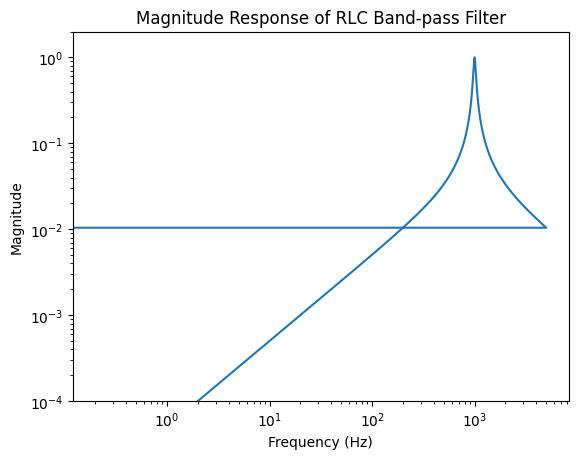

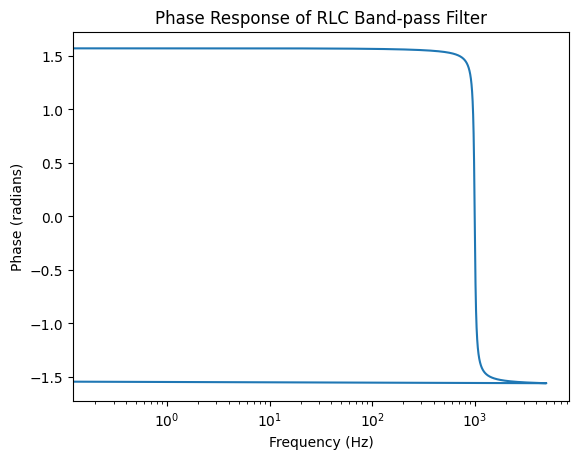

In [37]:
# Define the transfer function in terms of the central frequency and quality factor
def transfer_function(f, f0, Q):
    w0 = 2 * np.pi * f0
    w = 2 * np.pi * f
    x= w/w0
    return 1/(1+1.j*Q*(x-1/(x+1e-16)))

# Parameters of transfer function
Q = 20
f0 = 1000
samplingf = 10000 #(Hz)
timelenght = 5 #(s)
# ############################### #

N = int(samplingf*timelenght) # number of points

t = np.linspace(0, timelenght, N, endpoint=False) # Definition of time vector
frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector


TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
transNorm = np.absolute(TF_values)
transAngle = np.angle(TF_values)
TF_time_values = np.fft.ifft(np.fft.ifftshift(TF_values))

# Plot the Bode diagrams
plt.figure()
plt.loglog(frequencies, transNorm)
plt.ylim(0.0001, 2)
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.grid(which='both', axis='both')

plt.figure()
plt.semilogx(frequencies, transAngle)
plt.xscale('log')
plt.title('Phase Response of RLC Band-pass Filter' )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')


Text(0, 0.5, 'Phase (radians)')

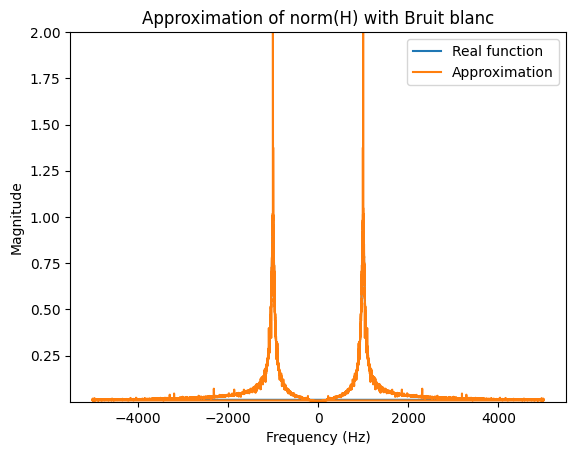

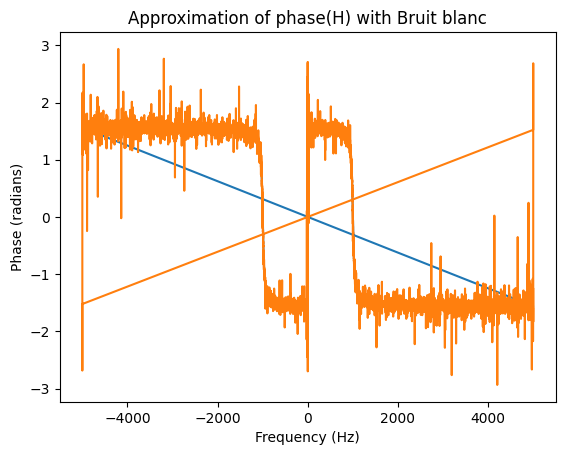

In [39]:
# MULTIPLE INPUT SIGNALS, UNCOMMENT THE LINES TO CHANGE THE SIGNAL TYPE

# %%%%                  SIN PUR              %%%%% #
# sinfreq =1000
# input_signal = np.sin(2*np.pi*sinfreq*t) # Sin pur
# type_signal=f'Sin pur (f={sinfreq})'

# %%%%          COMBINAISON DE SIN          %%%%% #
# input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # Combinaison de sin
# type_signal='Combinaison de sin'

# %%%%               BRUIT BLANC             %%%%% #
input_signal = np.random.normal(0, 1, N) # White noise
type_signal='Bruit blanc'

# %%%%                   DIRAC               %%%%% #
# def create_dirac_peak(length, position):
#     signal = np.zeros(length)
#     signal[position] = 1
#     return signal
# input_signal = create_dirac_peak(N, 0) # Dirac
# type_signal='Dirac'

# %%%%               CHIRP                    %%%%% #
# frequency_start = 5  # Starting frequency in Hz
# frequency_end = 5000  # Ending frequency in Hz
# input_signal = chirp(t, f0=frequency_start, f1=frequency_end, t1=1, method='linear') # Chirp
# type_signal=f'Chirp({frequency_start}-{frequency_end} Hz)'


input_signal_freq = np.fft.fft(input_signal)

output_signal_freq = TF_values*input_signal_freq
output_signal = np.real(np.fft.ifft(output_signal_freq))


Rxx = np.fft.fft(np.correlate(input_signal, input_signal, mode='full'))
Rxy = np.fft.fft(np.correlate(output_signal, input_signal, mode='full'))

frequencies2 = np.fft.fftfreq(len(Rxy),1/samplingf )

H_approx = Rxy/Rxx

TF_approx_norm = np.absolute(H_approx)
TF_approx_angle = np.angle(H_approx)

plt.figure()
plt.plot(frequencies, transNorm, label = 'Real function')
plt.plot(frequencies2, TF_approx_norm, label = 'Approximation')
plt.ylim(0.0001,2)
plt.title(f'Approximation of norm(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.figure()
plt.plot(frequencies, transAngle, label = 'Real function')
plt.plot(frequencies2, TF_approx_angle, label = 'Approximation')
plt.title(f'Approximation of phase(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

